In [1]:
import pandas as pd

In [2]:
#pip install scikit-learn==1.0.0
#pip install statsmodels==0.12.2

In [5]:
# from nsepy import get_history as gh
import datetime as dt

In [7]:
df=pd.read_csv("Tatacoffee13_21.csv", parse_dates=['Date'], index_col='Date')

In [9]:
# start = dt.datetime(2021,7,1)
# end = dt.datetime(2022,1,28)
# stk_data = gh(symbol='TATACOFFEE',start=start,end=end)

df


,Open,High,Low,Close
Date,,,,
2013-01-01,1410.60,1427.90,1408.30,1415.10
2013-01-02,1421.00,1626.60,1416.15,1607.40
2013-01-03,1632.55,1673.90,1613.05,1626.20
2013-01-04,1627.75,1627.75,1574.60,1579.05
2013-01-07,1580.00,1639.50,1565.50,1595.65
...,...,...,...,...
2021-12-22,202.90,207.80,201.35,205.00
2021-12-23,206.00,206.85,202.05,202.95
2021-12-24,203.90,203.90,199.35,201.00


In [11]:
df.tail(5)

,Open,High,Low,Close
Date,,,,
2021-12-22,202.90,207.80,201.35,205.00
2021-12-23,206.00,206.85,202.05,202.95
2021-12-24,203.90,203.90,199.35,201.00
2021-12-27,200.00,222.00,196.00,218.35
2021-12-28,219.65,220.45,211.55,212.35


In [13]:
#Start date and end_date
from datetime import date, timedelta

start_date = pd.to_datetime("2013-01-01")
end_date = pd.to_datetime("2019-02-04") - timedelta(days=1) #Excluding last

#List of all dates
all_date = pd.date_range(start_date, end_date, freq='d')

In [15]:
all_date

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06', '2013-01-07', '2013-01-08',
               '2013-01-09', '2013-01-10',
               ...
               '2019-01-25', '2019-01-26', '2019-01-27', '2019-01-28',
               '2019-01-29', '2019-01-30', '2019-01-31', '2019-02-01',
               '2019-02-02', '2019-02-03'],
              dtype='datetime64[ns]', length=2225, freq='D')

In [17]:
# stk_data=stk_data[["Open","High","Low","Close"]]

stk_data = df


In [19]:
stk_data.index = all_date

In [21]:
column="Close"

In [23]:
from sklearn.preprocessing import MinMaxScaler
Ms = MinMaxScaler()
data1= Ms.fit_transform(stk_data[[column]])
print("Len:",data1.shape)

Len: (2225, 1)


In [24]:
len(data1)

2225

In [25]:
training_size = round(len(data1 ) * 0.80)
print(training_size)
X_train=data1[:training_size]
X_test=data1[training_size:]
print("X_train length:",X_train.shape)
print("X_test length:",X_test.shape)
y_train=data1[:training_size]
y_test=data1[training_size:]
print("y_train length:",y_train.shape)
print("y_test length:",y_test.shape)

1780
X_train length: (1780, 1)
X_test length: (445, 1)
y_train length: (1780, 1)
y_test length: (445, 1)


In [31]:
from sklearn.metrics import mean_squared_error
trends=['n','t','c','ct'] # n - no trend, t - trend, c - Constant, ct - constant and trend
lags=[1,2,3,4]
from statsmodels.tsa.ar_model import AutoReg
for i in lags:
    #print(i)
   
    for td in trends:
        
        #print(td)
        #trendslist.append(td)
        model = AutoReg(X_train, lags=i,trend=td)
        model_fit = model.fit()
        # make prediction
        y_pred= model_fit.predict(len(X_train), len(data1)-1)
        #print(y_pred)
        #mse=mean_squared_error(y_test,y_pred,squared=False)
        from stockFunctions import rmsemape
        print("Lag={},Trend={}".format(i,td))
        rmsemape(y_test,y_pred)
        print("************")

Lag=1,Trend=n
RMSE-Testset: 0.058859347313837386
maPe-Testset: 108221610722.6124
************
Lag=1,Trend=t
RMSE-Testset: 0.06567306536707325
maPe-Testset: 105694109653.11649
************
Lag=1,Trend=c
RMSE-Testset: 0.04336525033767376
maPe-Testset: 114804919729.4369
************
Lag=1,Trend=ct
RMSE-Testset: 0.15273694386321382
maPe-Testset: 74699776526.6617
************
Lag=2,Trend=n
RMSE-Testset: 0.05946957243778465
maPe-Testset: 107811149748.47502
************
Lag=2,Trend=t
RMSE-Testset: 0.05333387798235344
maPe-Testset: 110268940666.54446
************
Lag=2,Trend=c
RMSE-Testset: 0.03487154364939403
maPe-Testset: 119368707397.79811
************
Lag=2,Trend=ct
RMSE-Testset: 0.15147077869435213
maPe-Testset: 72770748055.73935
************
Lag=3,Trend=n
RMSE-Testset: 0.05944295500377229
maPe-Testset: 108331645493.58391
************
Lag=3,Trend=t
RMSE-Testset: 0.05349798992052033
maPe-Testset: 110722667896.75185
************
Lag=3,Trend=c
RMSE-Testset: 0.03603799252428841
maPe-Testset: 

C:\Users\Pavithira\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Users\Pavithira\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Users\Pavithira\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Users\Pavithira\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared

In [33]:
len(y_pred)

445

In [39]:
i=2
td='ct'
model = AutoReg(X_train, lags=i,trend=td)
model_fit = model.fit()
# make prediction
y_pred= model_fit.predict(len(X_train), len(data1)-1)
#print(y_pred)
from sklearn.metrics import r2_score
mse=mean_squared_error(y_test,y_pred,squared=False)
from stockFunctions import rmsemape
print("Lag={},Trend={}".format(i,td))
rmsemape(y_test,y_pred)
print("************")

Lag=2,Trend=ct
RMSE-Testset: 0.15147077869435213
maPe-Testset: 72770748055.73935
************


C:\Users\Pavithira\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Users\Pavithira\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [41]:
y_pred

array([ 1.03722588e-02,  9.83916361e-03,  9.30647961e-03,  8.77524550e-03,
        8.24550235e-03,  7.71724511e-03,  7.19046664e-03,  6.66515972e-03,
        6.14131718e-03,  5.61893187e-03,  5.09799668e-03,  4.57850453e-03,
        4.06044839e-03,  3.54382124e-03,  3.02861611e-03,  2.51482606e-03,
        2.00244420e-03,  1.49146364e-03,  9.81877558e-04,  4.73679138e-04,
       -3.31383867e-05, -5.38581754e-04, -1.04265767e-03, -1.54537280e-03,
       -2.04673380e-03, -2.54674726e-03, -3.04541977e-03, -3.54275786e-03,
       -4.03876805e-03, -4.53345681e-03, -5.02683060e-03, -5.51889583e-03,
       -6.00965889e-03, -6.49912612e-03, -6.98730386e-03, -7.47419839e-03,
       -7.95981598e-03, -8.44416285e-03, -8.92724521e-03, -9.40906923e-03,
       -9.88964104e-03, -1.03689668e-02, -1.08470525e-02, -1.13239042e-02,
       -1.17995280e-02, -1.22739299e-02, -1.27471157e-02, -1.32190916e-02,
       -1.36898632e-02, -1.41594366e-02, -1.46278176e-02, -1.50950119e-02,
       -1.55610255e-02, -

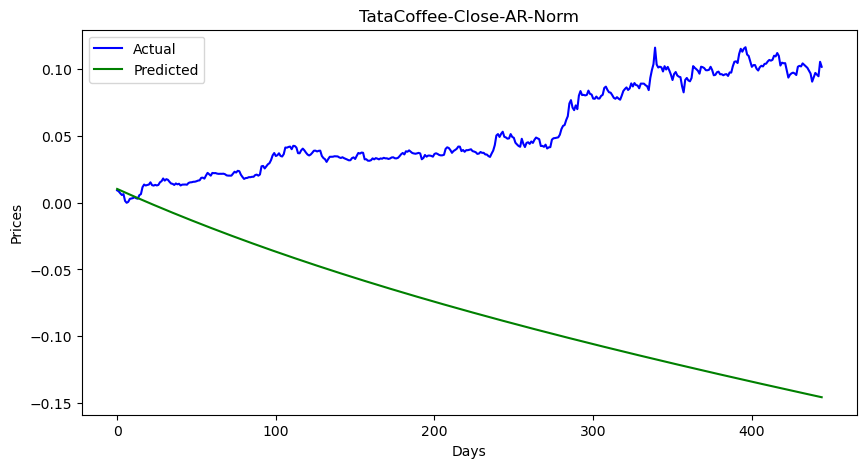

In [47]:
from stockFunctions import graph
graph(y_test,y_pred,"Actual","Predicted","TataCoffee-Close-AR-Norm","Days","Prices")

In [49]:
len(data1)

2225

In [51]:
y_test

array([[0.00931949],
       [0.00856893],
       [0.0070678 ],
       [0.00581686],
       [0.00650488],
       [0.00140731],
       [0.        ],
       [0.00068802],
       [0.0029397 ],
       [0.00325244],
       [0.00350263],
       [0.00422192],
       [0.00337753],
       [0.0030648 ],
       [0.00569177],
       [0.00650488],
       [0.01169627],
       [0.0136665 ],
       [0.01294721],
       [0.01335377],
       [0.01363523],
       [0.01532399],
       [0.01322867],
       [0.01288466],
       [0.01341631],
       [0.01300976],
       [0.01338504],
       [0.01535527],
       [0.01616838],
       [0.01820115],
       [0.0166062 ],
       [0.01770078],
       [0.01723167],
       [0.01573055],
       [0.01444834],
       [0.01416688],
       [0.01335377],
       [0.01447961],
       [0.01382287],
       [0.0142607 ],
       [0.01297848],
       [0.01360395],
       [0.01363523],
       [0.01369777],
       [0.01354141],
       [0.01485489],
       [0.01529272],
       [0.015

In [53]:
from stockFunctions import conversionSingle
aTestNormTable=conversionSingle(y_test,[column])

In [55]:
aTestNormTable

,Close
0,0.009319
1,0.008569
2,0.007068
3,0.005817
4,0.006505
...,...
440,0.097323
441,0.096041
442,0.094821
443,0.105673


In [57]:
actual_stock_price_test_ori=Ms.inverse_transform(aTestNormTable)

In [59]:
actual_stock_price_test_ori

array([[ 64.3 ],
       [ 63.1 ],
       [ 60.7 ],
       [ 58.7 ],
       [ 59.8 ],
       [ 51.65],
       [ 49.4 ],
       [ 50.5 ],
       [ 54.1 ],
       [ 54.6 ],
       [ 55.  ],
       [ 56.15],
       [ 54.8 ],
       [ 54.3 ],
       [ 58.5 ],
       [ 59.8 ],
       [ 68.1 ],
       [ 71.25],
       [ 70.1 ],
       [ 70.75],
       [ 71.2 ],
       [ 73.9 ],
       [ 70.55],
       [ 70.  ],
       [ 70.85],
       [ 70.2 ],
       [ 70.8 ],
       [ 73.95],
       [ 75.25],
       [ 78.5 ],
       [ 75.95],
       [ 77.7 ],
       [ 76.95],
       [ 74.55],
       [ 72.5 ],
       [ 72.05],
       [ 70.75],
       [ 72.55],
       [ 71.5 ],
       [ 72.2 ],
       [ 70.15],
       [ 71.15],
       [ 71.2 ],
       [ 71.3 ],
       [ 71.05],
       [ 73.15],
       [ 73.85],
       [ 74.  ],
       [ 74.55],
       [ 74.65],
       [ 75.2 ],
       [ 76.  ],
       [ 76.3 ],
       [ 79.3 ],
       [ 79.5 ],
       [ 78.35],
       [ 82.05],
       [ 85.25],
       [ 83.55

In [61]:
actual_stock_price_test_oriA=conversionSingle(actual_stock_price_test_ori,[column])

In [63]:
actual_stock_price_test_oriA

,Close
0,64.3
1,63.1
2,60.7
3,58.7
4,59.8
...,...
440,205.0
441,202.95
442,201.0
443,218.35


In [65]:
from stockFunctions import conversionSingle
aTestNormTable=conversionSingle(y_test,[column])
actual_stock_price_test_ori=Ms.inverse_transform(aTestNormTable)
actual_stock_price_test_oriA=conversionSingle(actual_stock_price_test_ori,[column])

In [67]:
from stockFunctions import conversionSingle
pTestNormTable=conversionSingle(y_pred,[column])
predicted_stock_price_test_ori=Ms.inverse_transform(pTestNormTable)
predicted_stock_price_test_oriP=conversionSingle(predicted_stock_price_test_ori,[column])

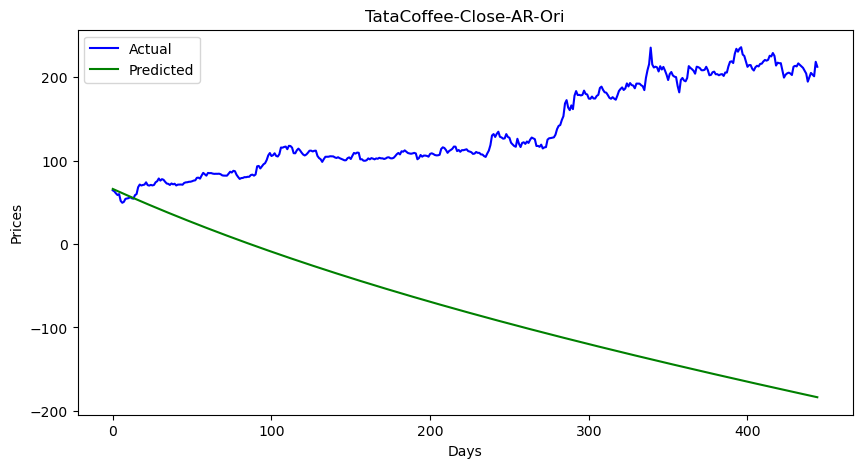

In [69]:
from stockFunctions import graph
graph(actual_stock_price_test_oriA,predicted_stock_price_test_oriP,"Actual","Predicted","TataCoffee-Close-AR-Ori","Days","Prices")

In [71]:
from stockFunctions import rmsemape
rmsemape(actual_stock_price_test_oriA,predicted_stock_price_test_oriP)

RMSE-Testset: 242.17148097653018
maPe-Testset: 1.4105998889566633


C:\Users\Pavithira\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [73]:
forecast=model_fit.predict(len(data1), len(data1)+3)

In [75]:
forecast

array([-0.145992  , -0.14625225, -0.14651233, -0.14677223])

In [77]:
from stockFunctions import conversionSingle
fTestNormTable=conversionSingle(forecast,["Closefore"])
forecast_stock_price_test_ori=Ms.inverse_transform(fTestNormTable)
forecast_stock_price_test_oriF=conversionSingle(forecast_stock_price_test_ori,["Closefore"])

In [79]:
forecast_stock_price_test_oriF

,Closefore
0,-184.012014
1,-184.428098
2,-184.843908
3,-185.259446


In [81]:
forecast_stock_price_test_oriF.to_csv("CloseAR.csv",index=False)

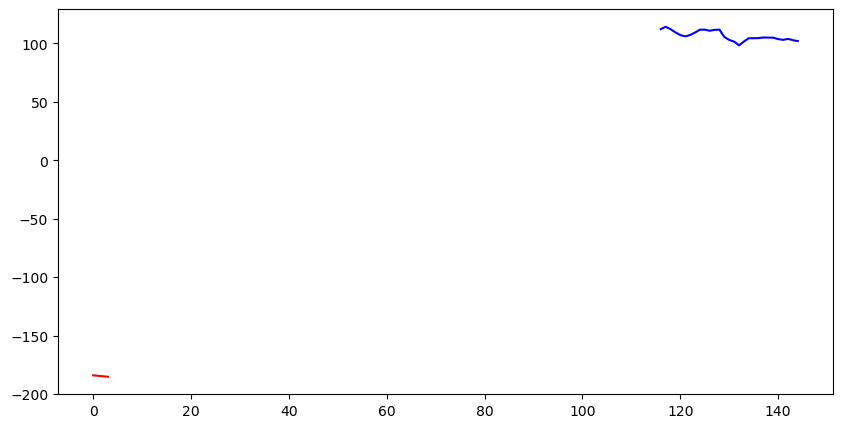

In [83]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,5))
plt.plot(actual_stock_price_test_oriA[116:145], color = 'blue', label="Actual")
plt.plot(forecast_stock_price_test_oriF, color = 'red', label ="Predicted")